$\textbf{Discrete Structures II - LECTURE 4 Assignment}$

$\textbf{Name:}$ Jyreneah Angel

$\textbf{Program and Year:}$ BSCS - 1

$\textbf{Class Schedule:}$ CIS 1203 - Group 3 (MW - 1:30-3:00 PM)

# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

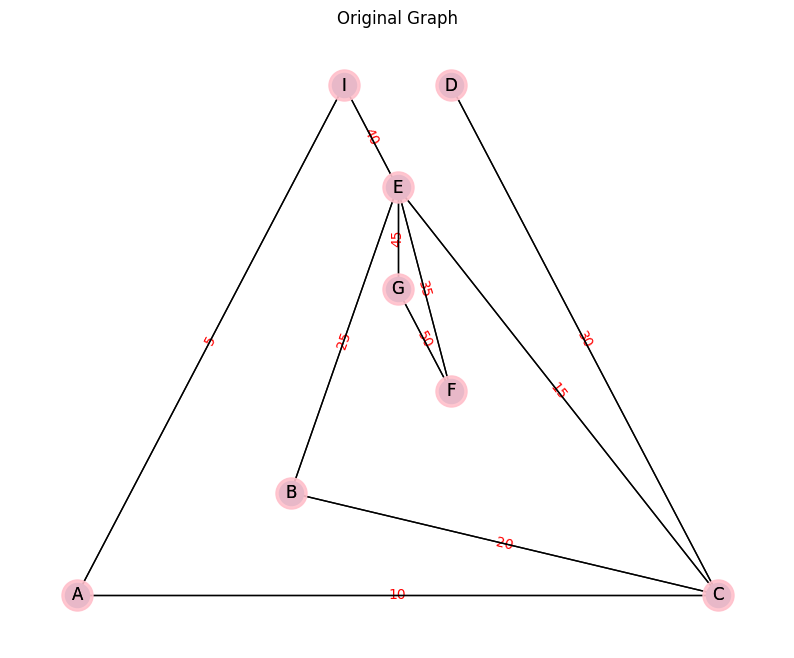

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.title("Original Graph")
plt.show()

$\textbf{1. Application of Kruskal's Algorithm}$

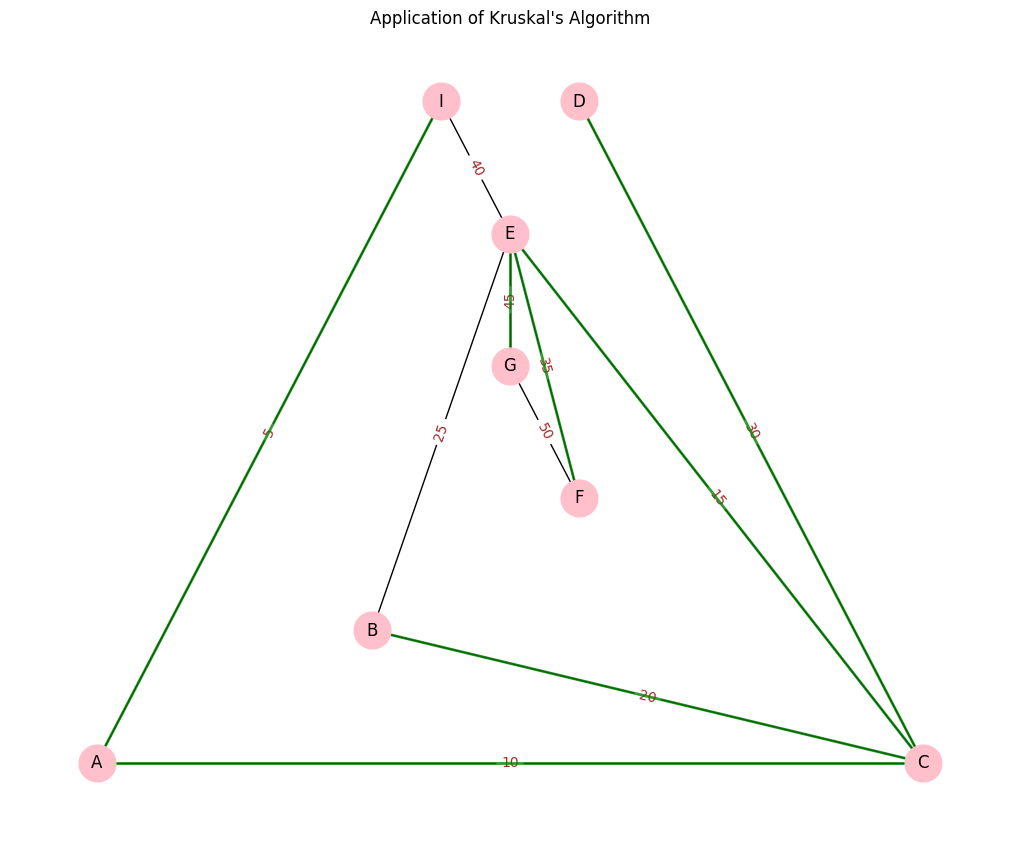

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph and set edge weights
G = nx.Graph()
edge_weights = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
                ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
                ("F", "G"): 50, ("G", "E"): 45}

# Add edges with weights to the graph
for edge, weight in edge_weights.items():
    u, v = edge
    G.add_edge(u, v, weight=weight)

# Define the layout for the graph
pos = nx.planar_layout(G)

# Use Kruskal's algorithm to find the minimum spanning tree
mst = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal')

# Plot the original graph
plt.figure(figsize=(10, 8))

# Draw the original graph nodes and edges
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=700)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='brown')

# Highlight the edges of the MST in the graph
mst_edges = list(mst.edges(data=True))
mst_edges_list = [(edge[0], edge[1]) for edge in mst_edges]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges_list, edge_color='green', width=2, alpha=0.8)

# Show the plot
plt.title("Application of Kruskal's Algorithm")
plt.show()

$\textbf{2. Application of Prim's Algorithm}$

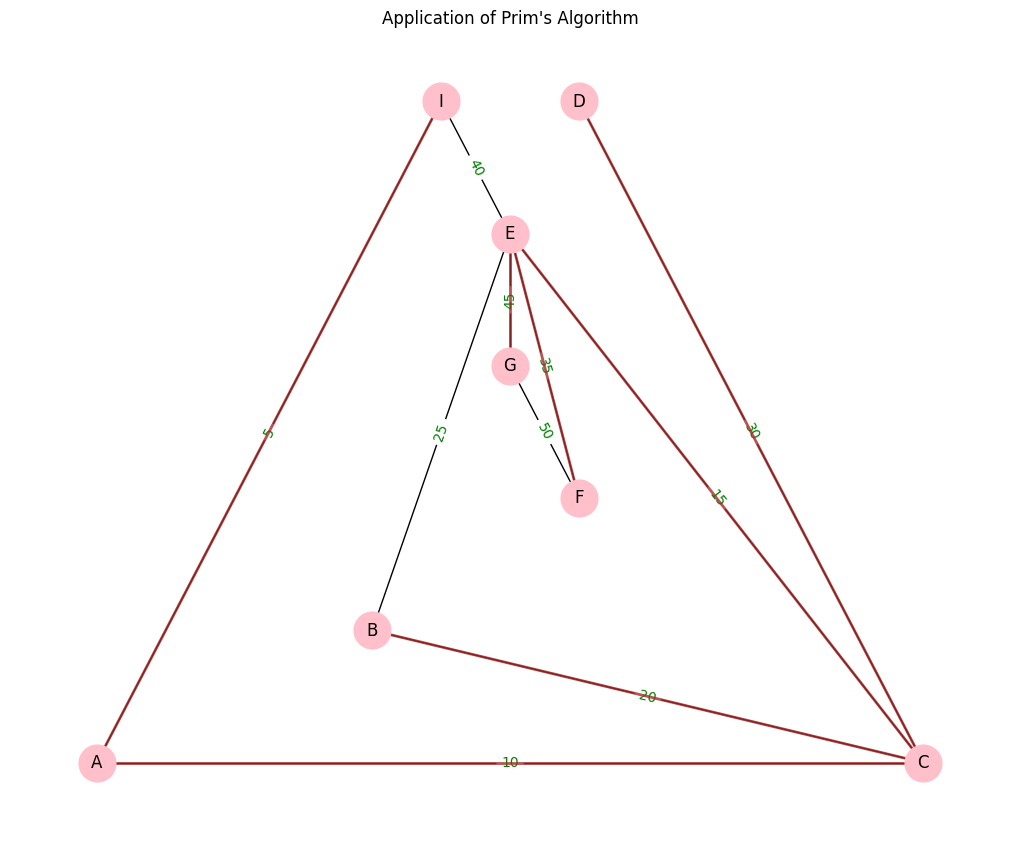

In [21]:
# Define a graph and assign weights to edges
G = nx.Graph()
edge_weights = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
                ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
                ("F", "G"): 50, ("G", "E"): 45}

# Add edges with weights to the graph
for edge, weight in edge_weights.items():
    u, v = edge
    G.add_edge(u, v, weight=weight)

# Define the layout for the graph
pos = nx.planar_layout(G)

# Find the minimum spanning tree using Prim's algorithm
mst = nx.minimum_spanning_tree(G, weight='weight', algorithm='prim')

# Plot the original graph
plt.figure(figsize=(10, 8))

# Draw the original graph nodes and edges
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=700)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='green')

# Highlight the edges of the minimum spanning tree
mst_edges = list(mst.edges(data=True))
mst_edges_list = [(edge[0], edge[1]) for edge in mst_edges]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges_list, edge_color='brown', width=2, alpha=0.8)

# Show the plot
plt.title("Application of Prim's Algorithm")
plt.show()

$\textbf{3. Application of Dijkstra's Algorithm}$

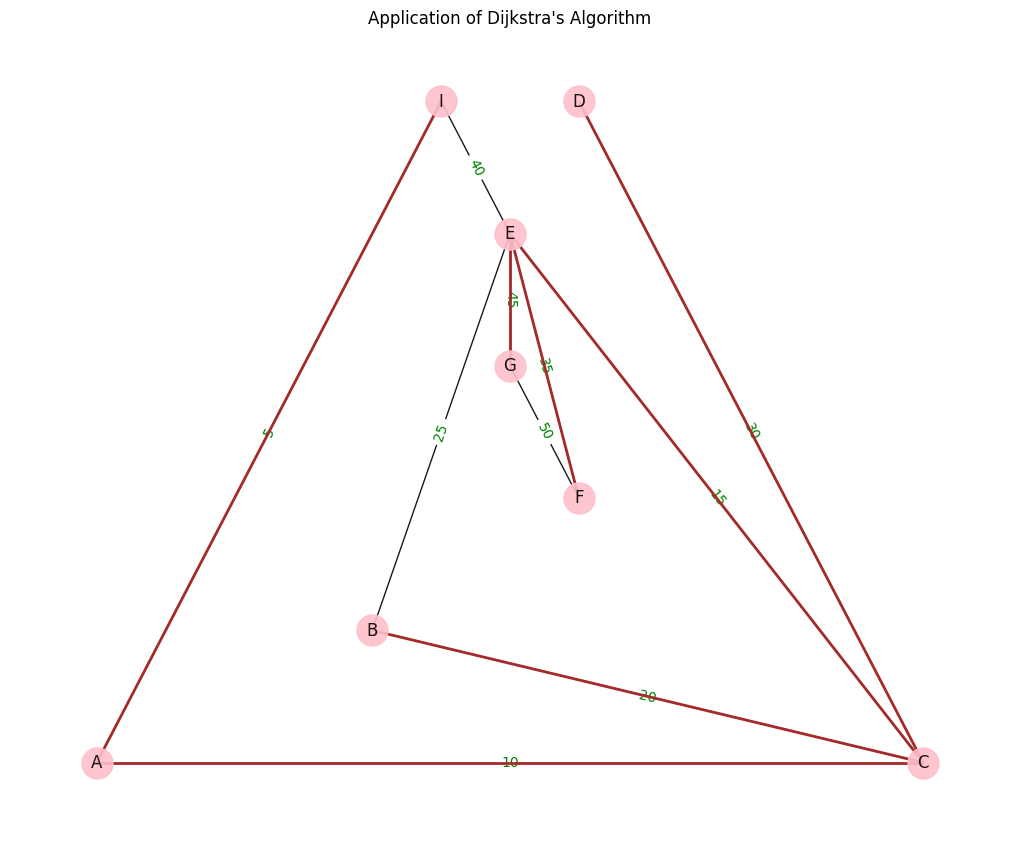

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0

    # Initialize priority queue with start node
    pq = [(0, start)]

    while pq:
        # Pop the node with the smallest distance from the priority queue
        current_distance, current_node = heapq.heappop(pq)

        # Relax edges from the current node
        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            distance_to_neighbor = current_distance + weight
            if distance_to_neighbor < distances[neighbor]:
                distances[neighbor] = distance_to_neighbor
                heapq.heappush(pq, (distance_to_neighbor, neighbor))

    return distances

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
edgelist = [
    ("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
    ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
    ("F", "G", 50), ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Compute shortest paths from node 'A'
shortest_paths = dijkstra(G, 'A')

# Create a new graph for the shortest-path tree
spt = nx.Graph()
for target, distance in shortest_paths.items():
    if target != 'A':
        # Find the path from source 'A' to target node
        path = nx.shortest_path(G, source='A', target=target, weight='weight')
        # Add the edges of this path to the shortest-path tree
        for i in range(len(path) - 1):
            spt.add_edge(path[i], path[i+1], weight=G[path[i]][path[i+1]]['weight'])

# Define the position of nodes using a planar layout
pos = nx.planar_layout(G)

# Plot the original graph for reference
plt.figure(figsize=(10, 8))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='green')

# Plot the shortest-path tree with red edges
nx.draw_networkx_edges(spt, pos, edge_color='brown', width=2)

plt.title("Application of Dijkstra's Algorithm")
plt.show()